# Demo Notebook for the vivainsights Python package

This notebook provides a demo for the **vivainsights** package. For more information about the package, please see:
- [Documentation](https://microsoft.github.io/vivainsights-py/)
- [GitHub Page](https://github.com/microsoft/vivainsights-py/)


### Loading the library and dataset

The following code loads the library 'vivainsights', and the function `load_pq_data()` loads a sample Person Query data to the environment. The first five rows of the data looks like the following: 

In [1]:
import vivainsights as vi

# load in-built datasets
pq_data = vi.load_pq_data() # load and assign in-built person query

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pq_data.head()

,Unnamed: 0,PersonId,MetricDate,After_hours_call_hours,After_hours_chat_hours,After_hours_collaboration_hours,After_hours_email_hours,After_hours_meeting_hours,After_hours_scheduled_call_hours,After_hours_unscheduled_call_hours,...,Working_hours_meeting_hours,Working_hours_scheduled_call_hours,Working_hours_unscheduled_call_hours,LevelDesignation,Layer,SupervisorIndicator,Organization,FunctionType,WeekendDays,IsActive
0,1,a6afe34c-8524-32d3-a368-1517b29b68cd,2022-05-01,0.0,0.0,18.675938,0.722722,18.25,0.0,0,...,19.50,0,0,Manager,3,Manager,Sales and Marketing,G_and_A,"[SUNDAY, SATURDAY]",True
1,2,d6368140-9312-380b-bbc9-9a32bcef4b83,2022-05-01,0.0,0.0,4.827803,0.925556,4.00,0.0,0,...,8.75,0,0,Support,3,Individual Contributor,Finance,Sales,"[SUNDAY, SATURDAY]",True
2,3,60bf99b0-65fd-3c3f-94fb-8ceb451d59e7,2022-05-01,0.0,0.0,1.497806,0.812806,0.75,0.0,0,...,12.50,0,0,Support,3,Individual Contributor,Product,IT,"[SUNDAY, SATURDAY]",True
3,4,93fddd74-3667-392b-ba5a-92d855772cb0,2022-05-01,0.0,0.0,59.265892,2.283668,59.00,0.0,0,...,28.50,0,0,Director,2,Manager+,Sales and Marketing,Analytics,"[SUNDAY, SATURDAY]",True
4,5,53183116-2cb2-32ee-9042-d62eb7061407,2022-05-01,0.0,0.0,2.146806,0.520167,1.75,0.0,0,...,7.50,0,0,Support,3,Individual Contributor,Sales and Marketing,IT,"[SUNDAY, SATURDAY]",True


### Run visuals

There are currently several visuals that you can run with the Person Query dataset. The first of these that you can run is a bar plot, which produces a person-average (first averaging by person, then averaging by group) for the groups in question. The parameters that you can provide to `create_bar()` are:

- `metric` - metric to analyze
- `hrvar` - grouping HR variable
- `mingroup` - minimum group size to display




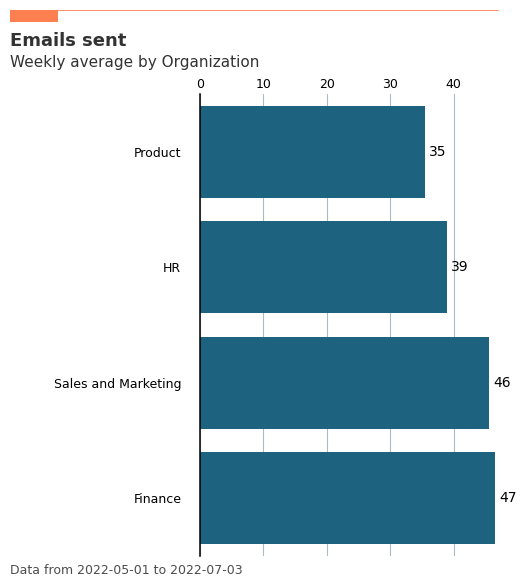

In [4]:
plot_bar = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5)

You can also ask the function to return a summary table by specifying the parameter `return_type`. This summary table can be copied to a clipboard with `export()`.

In [5]:
tb = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')
print(tb)

          Organization     metric   n
0              Finance  46.566667  27
3  Sales and Marketing  45.625806  31
1                   HR  38.971429  21
2              Product  35.433333  21


In [6]:
vi.export(tb)

Data frame copied to clipboard.
You may paste the contents directly to Excel.


()

Here are some other visual outputs, and their accompanying summary table outputs:

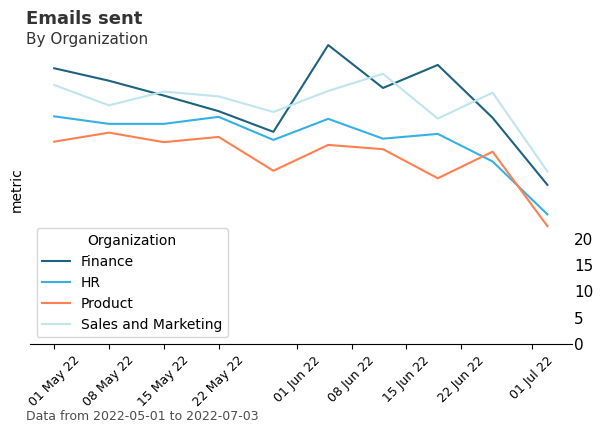

In [7]:
plot_line = vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [8]:
vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table').head()

,MetricDate,Organization,metric,n
0,2022-05-01,Finance,52.370370,27
1,2022-05-01,HR,43.238095,21
2,2022-05-01,Product,38.428571,21
3,2022-05-01,Sales and Marketing,49.193548,31
4,2022-05-08,Finance,50.000000,27


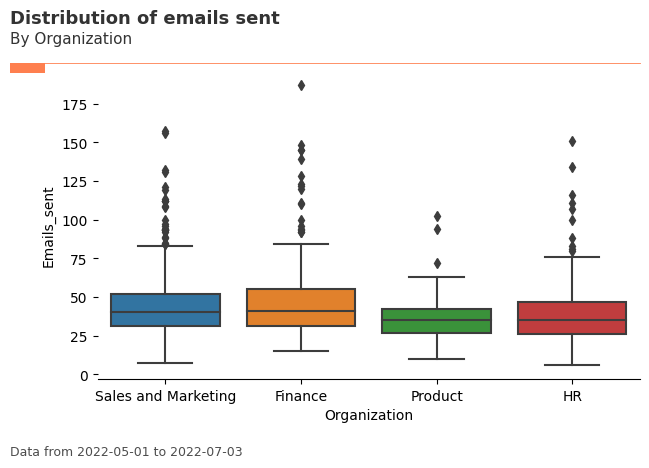

In [9]:
plot_box = vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [10]:
vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')

,index,group,mean,median,sd,min,max,n
0,0,Finance,46.566667,39.6,21.739330,28.5,134.5,27
1,1,HR,38.971429,36.0,16.793366,22.1,98.9,21
2,2,Product,35.433333,33.4,6.608505,29.6,59.5,21
3,3,Sales and Marketing,45.625806,38.4,20.387577,24.4,119.0,31


## Exploratory data analysis

Some functions are designed to perform a rapid exploratory analysis of the dataset, and one of these functions is `create_rank()`. With `create_rank()`, you can explore all the groupings within your population and rank them with respect to a metric you choose. 

In [11]:
vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'table'
)

,hrvar,attributes,metric,n
2,SupervisorIndicator,Manager+,72.043614,6
0,LevelDesignation,Director,72.043614,6
5,FunctionType,Marketing,28.992283,12
1,SupervisorIndicator,Manager,26.884630,11
2,LevelDesignation,Manager,26.884630,11
3,Organization,Sales and Marketing,25.765574,31
1,LevelDesignation,Junior IC,21.447389,10
7,FunctionType,Sales,21.294210,11
2,FunctionType,Engineering,19.436244,20
0,FunctionType,Analytics,18.348926,12


This can be visualized as well:

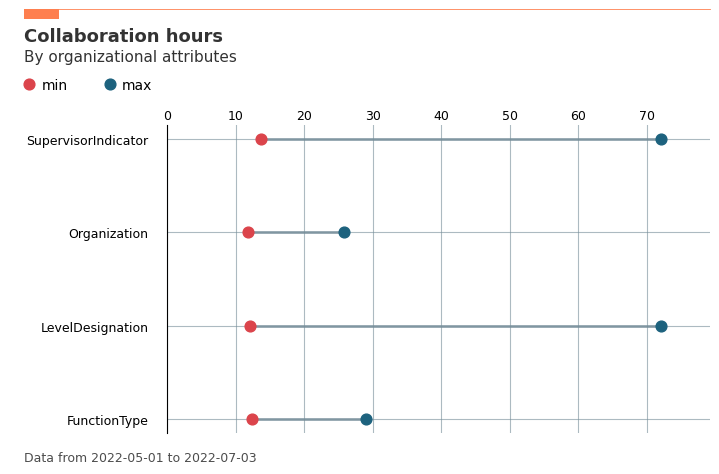

In [12]:
plot_rank = vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'plot'
)

### Validating / exploring the data

Since HR variables or organizational attributes are a key part of the analysis process, it is also possible to perform some exploration or validation before we begin the analysis. 

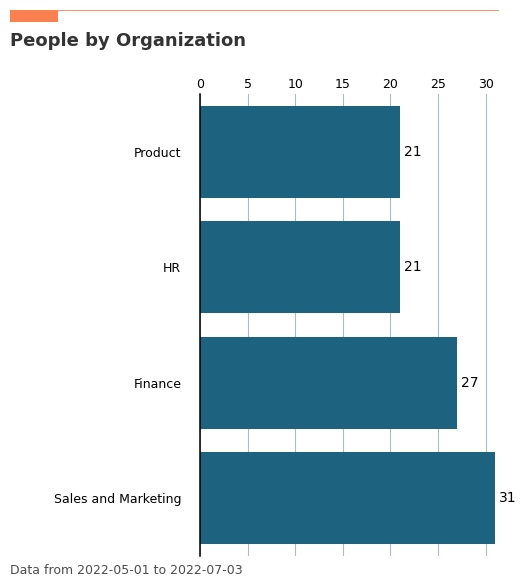

In [13]:
plot_hrcount = vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='plot')

In [14]:
vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='table')

,Organization,n
3,Sales and Marketing,31
0,Finance,27
1,HR,21
2,Product,21
